In [5]:
import torchray
import numpy as np
import xml.etree.ElementTree as ET
import cv2
import time
import torch
from torch.autograd import Variable
from torchvision import models
import sys
import numpy as np
import torchvision.datasets as datasets
import glob
import torchray.benchmark
from torchray.attribution.gradient import gradient
from matplotlib import pyplot as plt
import torchray.benchmark.pointing_game
import os
import torchvision.transforms as transforms
import miscel
import torchray.benchmark.pointing_game
import miscel
import loadmodel as lm
from numpy import savetxt
import exp
from torchray.attribution.extremal_perturbation import extremal_perturbation, contrastive_reward, simple_reward
from torchray.attribution.grad_cam import grad_cam
import matplotlib.patches as patches


In [6]:
use_cuda = torch.cuda.is_available()
def loadAlex():
    model = models.alexnet(pretrained=True)
    model.eval()
    if use_cuda:
        model.cuda()

    for p in model.parameters():
        p.requires_grad = False

    return model

def loadResnet():
    model = models.resnet50(pretrained=True)
    model.eval()
    if use_cuda:
        model.cuda()

    for p in model.parameters():
        p.requires_grad = False

    return model

def loadvgg():
    model = models.vgg16(pretrained=True)
    model.eval()
    if use_cuda:
        model.cuda()

    for p in model.parameters():
        p.requires_grad = False

    return model

In [7]:
'''# Validating energy based pointing game of ScoreCam, using Gradient and VGG16: they reported 41.3%,
# we obtained 41.6%

# Initializing number of hits in pointing game and total time
ttotal = 0
pgtot = 0
pgms=0
# Initializing list for runtime
l = []

# number of images we need to calculate things for
nimg = vall.selection
aaa = 0
for i in range(1000):
    img, labele = vall[i]
    bbname = vall.get_image_url(i).split("/")[-1].split(".")[0]             # Extracting image url to retrieve its BB
    imwidth, imheight, xmin, ymin, xmax, ymax = miscel.bbinfo(bbname)
    aimg = imwidth*imheight
    abb = (xmax-xmin)*(ymax-ymin)

    if aimg>2*abb:

        aaa+=1
        x = img.unsqueeze(0)
        x = x.cuda()
        saliency = gradient(model, x, labele)
        end = time.time()
        #print(saliency)
        saliency = (saliency - torch.min(saliency))/torch.max(saliency)
        #print(saliency)
        salmap = miscel.sares(saliency, imwidth, imheight)
        alenergy = np.sum(salmap)
        Y, a = miscel.gtbb(imwidth, imheight, xmin, ymin, xmax, ymax)
        whlene = np.multiply(a, salmap)
        gdener = np.sum(whlene)
        dd = gdener/alenergy
        if dd ==0:
            print("what the hell happened?")
        l.append(dd)
        
print("wtf: ", sum(l)/aaa)
print(aaa)'''


'# Validating energy based pointing game of ScoreCam, using Gradient and VGG16: they reported 41.3%,\n# we obtained 41.6%\n\n# Initializing number of hits in pointing game and total time\nttotal = 0\npgtot = 0\npgms=0\n# Initializing list for runtime\nl = []\n\n# number of images we need to calculate things for\nnimg = vall.selection\naaa = 0\nfor i in range(1000):\n    img, labele = vall[i]\n    bbname = vall.get_image_url(i).split("/")[-1].split(".")[0]             # Extracting image url to retrieve its BB\n    imwidth, imheight, xmin, ymin, xmax, ymax = miscel.bbinfo(bbname)\n    aimg = imwidth*imheight\n    abb = (xmax-xmin)*(ymax-ymin)\n\n    if aimg>2*abb:\n\n        aaa+=1\n        x = img.unsqueeze(0)\n        x = x.cuda()\n        saliency = gradient(model, x, labele)\n        end = time.time()\n        #print(saliency)\n        saliency = (saliency - torch.min(saliency))/torch.max(saliency)\n        #print(saliency)\n        salmap = miscel.sares(saliency, imwidth, imheight)\

In [8]:
'''# Validating energy based pointing game of ScoreCam, using GradCam and VGG16. Reported 48%, got 45%.
# It is close enough!

# Initializing number of hits in pointing game and total time
ttotal = 0
pgtot = 0
pgms=0
# Initializing list for runtime
l = []

# number of images we need to calculate things for
nimg = vall.selection
aaa = 0
for i in range(1000):
    img, labele = vall[i]
    bbname = vall.get_image_url(i).split("/")[-1].split(".")[0]             # Extracting image url to retrieve its BB
    imwidth, imheight, xmin, ymin, xmax, ymax = miscel.bbinfo(bbname)
    aimg = imwidth*imheight
    abb = (xmax-xmin)*(ymax-ymin)

    if aimg>2*abb:

        aaa+=1
        x = img.unsqueeze(0)
        x = x.cuda()
        saliency = grad_cam(model, x, labele, saliency_layer='features.29')
        end = time.time()
        #print(saliency)
        saliency = (saliency - torch.min(saliency))/torch.max(saliency)
        #print(saliency)
        salmap = miscel.sares(saliency, imwidth, imheight)
        alenergy = np.sum(salmap)
        Y, a = miscel.gtbb(imwidth, imheight, xmin, ymin, xmax, ymax)
        whlene = np.multiply(a, salmap)
        gdener = np.sum(whlene)
        dd = gdener/alenergy
        if dd ==0:
            print("what the hell happened?")
        l.append(dd)
        
print("wtf: ", sum(l)/aaa)
print(aaa)
'''


'# Validating energy based pointing game of ScoreCam, using GradCam and VGG16. Reported 48%, got 45%.\n# It is close enough!\n\n# Initializing number of hits in pointing game and total time\nttotal = 0\npgtot = 0\npgms=0\n# Initializing list for runtime\nl = []\n\n# number of images we need to calculate things for\nnimg = vall.selection\naaa = 0\nfor i in range(1000):\n    img, labele = vall[i]\n    bbname = vall.get_image_url(i).split("/")[-1].split(".")[0]             # Extracting image url to retrieve its BB\n    imwidth, imheight, xmin, ymin, xmax, ymax = miscel.bbinfo(bbname)\n    aimg = imwidth*imheight\n    abb = (xmax-xmin)*(ymax-ymin)\n\n    if aimg>2*abb:\n\n        aaa+=1\n        x = img.unsqueeze(0)\n        x = x.cuda()\n        saliency = grad_cam(model, x, labele, saliency_layer=\'features.29\')\n        end = time.time()\n        #print(saliency)\n        saliency = (saliency - torch.min(saliency))/torch.max(saliency)\n        #print(saliency)\n        salmap = miscel.

In [9]:
# PreXpriment for Gradient method. Evaluate function doesn't work with tolerance = 0 because 
# it makes a matrix of distance from our given point and technically just the point itself has the distance
# zero. So the boolean matrix if the tolerance is 0 would be all false because of this line of code:
#  "accept = (v + u) < self.tolerance**2", technically it needs to have an equal sign to make it work for zero
# as tolerance!

# Correction: tolerance 1 is like tolerance of zero by definition since it checks all the points that have 
# distance of less than 1 which the only point is our own point (xloc, yloc) which eventuall would have 1 True
# if it is in the BB!

'''
# Transforms needs to be applied to our data set
val_transforms = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])]) 

# 2000 images randomly taken from Imagenet(ILSVRC2012) validation set
vall = torchray.benchmark.datasets.ImageFolder('/home/mallet/Desktop/VanillaVsARobust/validationSample',
                                               transform=val_transforms)

# Initializing number of hits in pointing game and total time
ttotal = 0
pgtot = 0

# Initializing list for runtime
l = []
model = lm.loadResnet()
# number of images we need to calculate things for
nimg = vall.selection
aaa = 0
i=1483
img, labele = vall[i]
bbname = vall.get_image_url(i).split("/")[-1].split(".")[0]   
imwidth, imheight, xmin, ymin, xmax, ymax = miscel.bbinfo(bbname)

x = img.unsqueeze(0)
x = x.cuda()
saliency = gradient(model, x, labele)

saliency = (saliency - saliency.min()) /saliency.max()
print(saliency)
sal = torch.squeeze(saliency)
plt.imshow(sal.data.cpu(), cmap='Reds')
plt.show()
xminn, yminn, xmaxn, ymaxn = miscel.newloc(imwidth, imheight, xmin, ymin, xmax, ymax)
xloc,yloc = miscel.findloc(saliency)
Y = miscel.gtbb(xminn, yminn, xmaxn, ymaxn)
print(xloc, yloc)
plt.imshow(Y, cmap='Reds')
plt.show()
test = torchray.benchmark.pointing_game.PointingGame(1000, tolerance=0)
pg = test.evaluate(Y, (yloc,xloc))
print(pg)
print(saliency.max())
print(saliency.shape)
print(torch.squeeze(saliency)[xloc, yloc])
Y[123, 170]=True
plt.imshow(Y, cmap='Reds')
plt.show()'''

'\n# Transforms needs to be applied to our data set\nval_transforms = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),\n                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])]) \n\n# 2000 images randomly taken from Imagenet(ILSVRC2012) validation set\nvall = torchray.benchmark.datasets.ImageFolder(\'/home/mallet/Desktop/VanillaVsARobust/validationSample\',\n                                               transform=val_transforms)\n\n# Initializing number of hits in pointing game and total time\nttotal = 0\npgtot = 0\n\n# Initializing list for runtime\nl = []\nmodel = lm.loadResnet()\n# number of images we need to calculate things for\nnimg = vall.selection\naaa = 0\ni=1483\nimg, labele = vall[i]\nbbname = vall.get_image_url(i).split("/")[-1].split(".")[0]   \nimwidth, imheight, xmin, ymin, xmax, ymax = miscel.bbinfo(bbname)\n\nx = img.unsqueeze(0)\nx = x.cuda()\nsaliency = gradient(model, x, labele)\n\nsalien

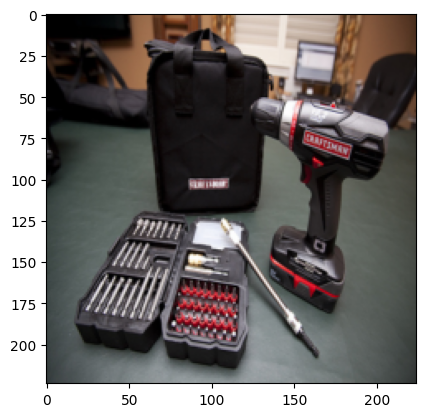

torch.Size([1, 1, 224, 224])
7.763157606124878
tensor(0.9984, device='cuda:0', grad_fn=<MaxBackward1>) tensor(0., device='cuda:0', grad_fn=<MinBackward1>)


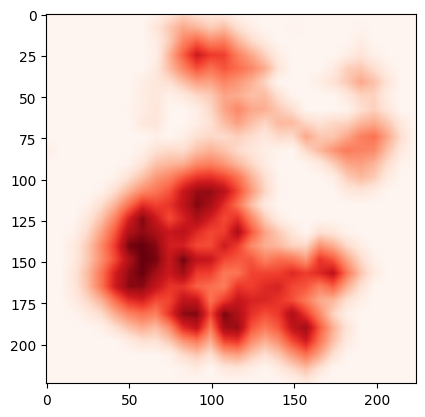

141 58


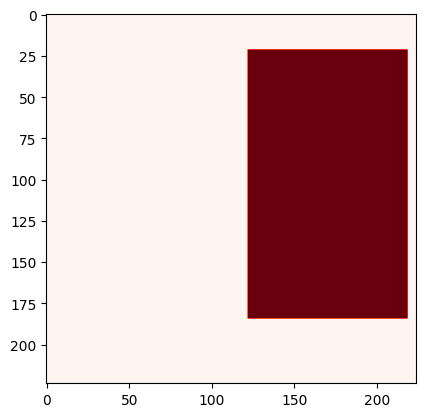

-1


IndexError: index 141 is out of bounds for dimension 0 with size 1

In [11]:
# PreXpriment for MP method. The result for robust and Vanilla are really close and it seems
# it is due to the fact that when the true label doesn't have much of probability the respective
# mask is small and weak in this method! Maybe it needs to be investigated later!

# Transforms needs to be applied to our data set
val_transforms = transforms.Compose([transforms.Resize((224,224))])    
# 2000 images randomly taken from Imagenet(ILSVRC2012) validation set
vall = torchray.benchmark.datasets.ImageFolder('/home/mallet/Desktop/VanillaVsARobust/validationSample',transform = val_transforms)

# Initializing number of hits in pointing game and total time
ttotal = 0
pgtot = 0

# Initializing list for runtime
l = []
i = 1483
# number of images we need to calculate things for
nimg = vall.selection
model = lm.loadResnet()

img, labele = vall[i]     
plt.imshow(np.asanyarray(img))
plt.show()
bbname = vall.get_image_url(i).split("/")[-1].split(".")[0]             # Extracting image url to retrieve its BB
imwidth, imheight, xmin, ymin, xmax, ymax = miscel.bbinfo(bbname)  
xminn, yminn, xmaxn, ymaxn = miscel.newloc(imwidth, imheight, xmin, ymin, xmax, ymax)

ti, saliency = exp.mp(model, img, labele, 300)
print(saliency.shape)
print(ti)
print(saliency.max(), saliency.min())
saliency = miscel.normlze(saliency)
sal = torch.squeeze(saliency)
plt.imshow(sal.cpu().detach().numpy(), cmap='Reds')
plt.show()
xloc,yloc = miscel.findloc(saliency)
print(xloc, yloc)
Y = miscel.gtbb(xminn, yminn, xmaxn, ymaxn)
test = torchray.benchmark.pointing_game.PointingGame(1000, tolerance=15)
pg = test.evaluate(Y, (yloc,xloc))
plt.imshow(Y, cmap='Reds')
plt.show()
print(pg)
print(saliency[xloc, yloc])


In [ ]:
# Transforms needs to be applied to our data set
val_transforms = transforms.Compose([transforms.Resize(256),transforms.CenterCrop(224), transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])    
# 2000 images randomly taken from Imagenet(ILSVRC2012) validation set
vall = torchray.benchmark.datasets.ImageFolder('/home/mallet/Desktop/VanillaVsARobust/validationSample',transform = val_transforms)

# Initializing number of hits in pointing game and total time
ttotal = 0
pgtot = 0

# Initializing list for runtime
l = []

# number of images we need to calculate things for
nimg = vall.selection
i =1483
img, labele = vall[i]
bbname = vall.get_image_url(i).split("/")[-1].split(".")[0]             # Extracting image url to retrieve its BB
imwidth, imheight, xmin, ymin, xmax, ymax = miscel.bbinfo(bbname) 
xminn, yminn, xmaxn, ymaxn = miscel.newloc(imwidth, imheight, xmin, ymin, xmax, ymax)

x = img.unsqueeze(0)
x = x.cuda()
saliency,_ = extremal_perturbation( model, x, labele, reward_func=simple_reward, debug=False, areas=[0.12])
end = time.time()
I = np.transpose(I, (1, 2, 0))
exp.save(saliency, I, args.method, args.model, bbname)
tm = end - start
ttotal = ttotal + tm
z = saliency, labele, bbname
lslb.append(z)
l.append(tm)
xloc,yloc = miscel.findloc(saliency)
Y = miscel.gtbb(imwidth, imheight, xmin, ymin, xmax, ymax)
test = torchray.benchmark.pointing_game.PointingGame(1000, tolerance=15)
pg = test.evaluate(Y, (yloc,xloc))
if pg==1:
    pgtot+=1
